No usar este formato, no se puede convertir .avif en .jpg, .png, ...

In [ ]:
!pip install onedrivedownloader
from onedrivedownloader import download

PATH_FILE = 'https://universidadfv-my.sharepoint.com/:u:/g/personal/alberto_desantos_ufv_es/EW0GWd1MeIhDk6-KJS-igagBtyZQUVzLJ77OVCsyOkdCDA?e=busziB'
download(url = PATH_FILE, filename = 'image.avif', unzip=False, force_download=True, clean=False)

Importamos las librerías que usaremos en el procesamiento:

In [ ]:
from skimage.morphology import dilation
from skimage.morphology import disk
from skimage.filters import threshold_otsu, threshold_local
from skimage.color import rgb2gray
from skimage import io

Cargamos la imagen que vamos a procesar para contar su número de células:

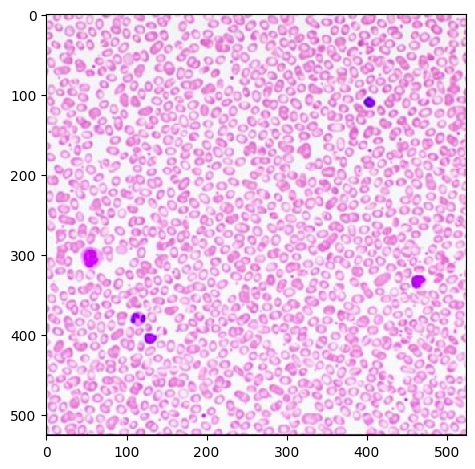

In [ ]:
image = io.imread('image.jpg')
io.imshow(image)
io.show()

Transformamos el espacio de colores rgb en escala de grises mediante los filtros:


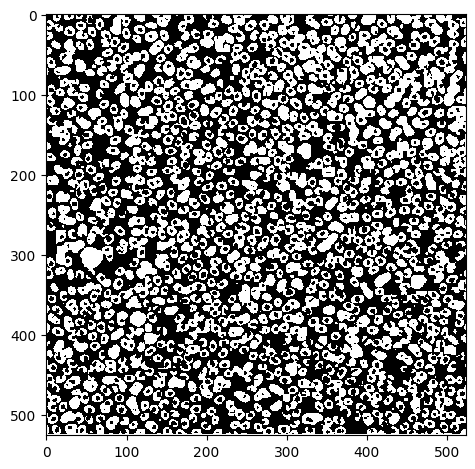

In [ ]:
imagegs = rgb2gray(image)

global_thresh = threshold_otsu(imagegs)
binary_global = imagegs < global_thresh

io.imshow(binary_global)
io.show()

Para memoria:

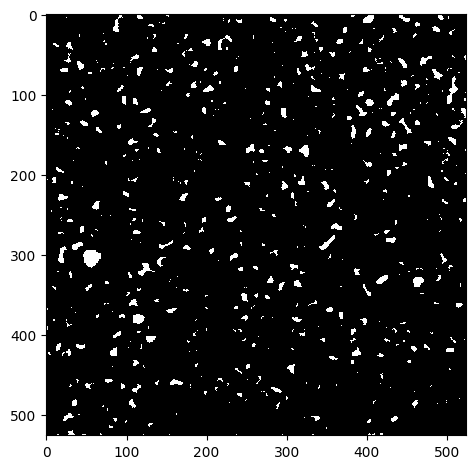

In [ ]:
from skimage.morphology import erosion
from skimage.morphology import disk
import skimage.io as io

# Cargar la imagen
image = binary_global # Reemplaza 'imagen.jpg' con el nombre de tu archivo de imagen

# Crear un elemento estructurante (disco de radio 2)
selem = disk(3)

# Realizar la erosión
eroded_image = erosion(image, selem)

# Mostrar la imagen erosionada
io.imshow(eroded_image)
io.show()

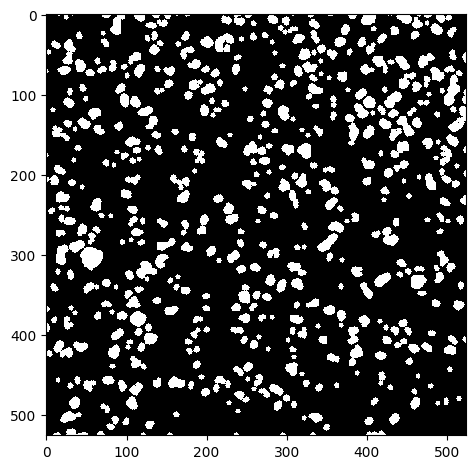

In [ ]:
# Crear un elemento estructurante (disco de radio 2)
selem = disk(3)

# Realizar la dilatación
dilated_image = dilation(eroded_image, selem)

# Mostrar la imagen dilatada
io.imshow(dilated_image)
io.show()

In [ ]:
from skimage.measure import label

# Etiquetar los blobs en la imagen
labeled_image = label(binary_global)

# Contar el número de blobs
num_blobs = labeled_image.max()

# Imprimir el número de blobs
print(f"Número de blobs: {num_blobs}")

Número de blobs: 769


In [ ]:
from skimage.measure import label

# Etiquetar los blobs en la imagen
labeled_image = label(eroded_image)

# Contar el número de blobs
num_blobs = labeled_image.max()

# Imprimir el número de blobs
print(f"Número de blobs: {num_blobs}")

Número de blobs: 636


In [ ]:
from skimage.measure import label

# Etiquetar los blobs en la imagen
labeled_image = label(dilated_image)

# Contar el número de blobs
num_blobs = labeled_image.max()

# Imprimir el número de blobs
print(f"Número de blobs: {num_blobs}")

Número de blobs: 491


Código a usar:

Contamos los labels en la imagen estándar

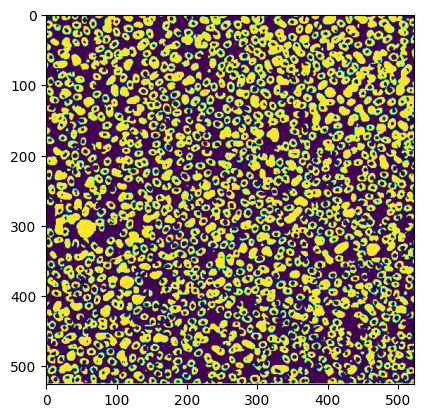

In [ ]:
plt.imshow(binary_global)
plt.show()

In [ ]:
from skimage.measure import label, regionprops

labeled_binary = label(binary_global)

# Get the number of labels (connected regions)
num_labels = labeled_binary.max()

# Print the number of labels
print(f"Number of labels in the image: {num_labels}")

Number of labels in the image: 769


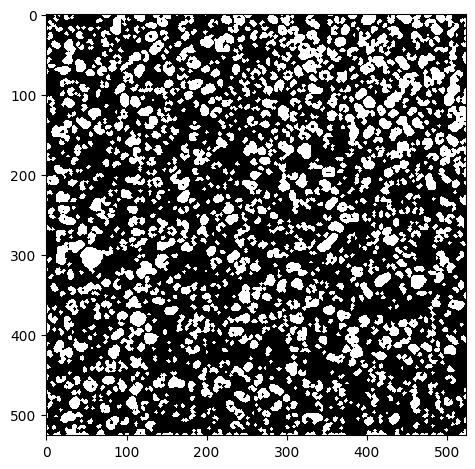

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage import morphology

binary_cleaned = morphology.opening(binary_global, morphology.disk(2))

io.imshow(binary_cleaned)
io.show()

In [ ]:
from skimage.measure import label, regionprops

labeled_binary_image = label(binary_cleaned)

# Get the number of labels (connected regions)
num_labels = labeled_binary_image.max()

# Print the number of labels
print(f"Number of labels in the image: {num_labels}")

Number of labels in the image: 1090


Esto no hace nada pero lo usamos para tener múltiples blobs rellenos

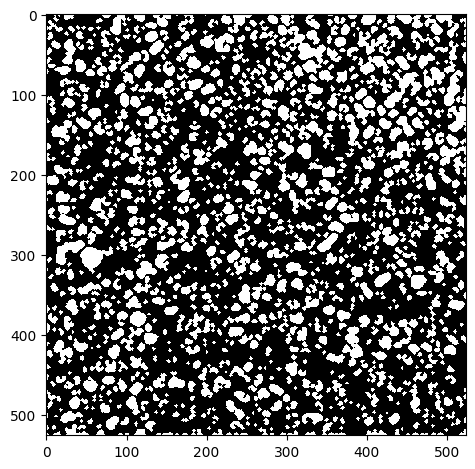

In [ ]:
from scipy.ndimage import binary_fill_holes

binary_filled = binary_fill_holes(binary_cleaned)
io.imshow(binary_filled)
io.show()

In [ ]:
# Etiquetar los blobs en la imagen
labeled_image = label(binary_filled)

# Contar el número de blobs
num_blobs = labeled_image.max()

# Imprimir el número de blobs
print(f"Número de blobs: {num_blobs}")

Número de blobs: 1090


Intento de hacer la resta de imágenes por lógica usando código de otros notebooks

In [ ]:
import numpy as np
def resta_imagenes(imagen1, imagen2):
  """Resta la imagen2 de la imagen1, eliminando la intersección.

  Args:
    imagen1: La primera imagen (NumPy array).
    imagen2: La segunda imagen (NumPy array).

  Returns:
    La imagen resultante (NumPy array).
  """

  # Calcular la intersección entre las dos imágenes.
  interseccion = np.logical_and(imagen1, imagen2)

  # Restar la intersección de la primera imagen.
  imagen_resultante = imagen1.astype(bool)  # Convertir a booleano si es necesario
  imagen_resultante[interseccion] = False  # Eliminar la intersección

  return imagen_resultante

In [ ]:
imagen_restada = resta_imagenes(binary_global, binary_filled)
num_true_values = imagen_restada.sum()
print(f"Número de valores True en la imagen: {num_true_values}")

Número de valores True en la imagen: 35129


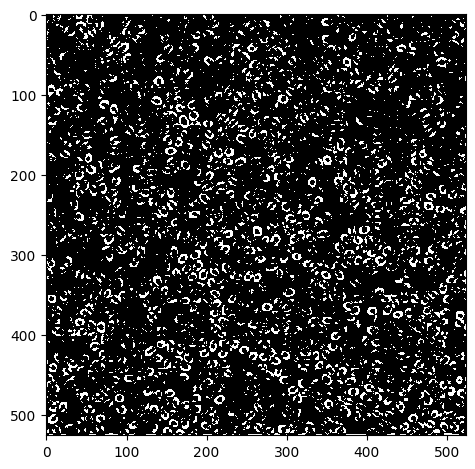

In [ ]:
from skimage import io

# Suponiendo que 'imagen_restada' es tu matriz booleana
io.imshow(imagen_restada)
io.show()

In [ ]:
# Etiquetar los blobs en la imagen
labeled_image = label(imagen_restada)

# Contar el número de blobs
num_blobs_2 = labeled_image.max()

# Imprimir el número de blobs
print(f"Número de blobs: {num_blobs_2}")

Número de blobs: 3530
